In [1]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv("new_train.csv", header=0)
test = pd.read_csv("new_xtest.csv", header=0)

df=df.dropna()
test=test.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 18 columns):
Homepage              10466 non-null float64
Homepage _Duration    10466 non-null float64
Aboutus               10466 non-null float64
Aboutus_Duration      10466 non-null float64
Contactus             10466 non-null float64
Contactus_Duration    10466 non-null float64
BounceRates           10466 non-null float64
ExitRates             10466 non-null float64
PageValues            10480 non-null float64
SpecialDay            10480 non-null float64
Month                 10480 non-null int64
OperatingSystems      10480 non-null int64
Browser               10480 non-null int64
Province              10480 non-null int64
TrafficType           10480 non-null int64
VisitorType           10480 non-null int64
Weekend               10480 non-null int64
Revenue               10480 non-null int64
dtypes: float64(10), int64(8)
memory usage: 1.4 MB


In [38]:
['Homepage', 'Homepage _Duration', 'Aboutus', 'Aboutus_Duration',
       'Contactus', 'Contactus_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Province', 'TrafficType', 'VisitorType', 'Weekend']
X = df[a]
x_test=test[a]
y = df['Revenue']

(10466,)

In [39]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.models import Model

In [41]:
input_layer = Input(shape=(13,))
encode_layer1 = Dense(128, activation='relu')(input_layer)
encode_layer2 = Dense(64, activation='relu')(encode_layer1)
encode_layer3 = Dense(32, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(4, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(32, activation='relu')(latent_view)
decode_layer2 = Dense(64, activation='relu')(decode_layer1)
decode_layer3 = Dense(128, activation='relu')(decode_layer2)
output_layer  = Dense(13)(decode_layer3)
output_layer  = Dense(13)(decode_layer3)

model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

In [42]:
model.fit(X, X, epochs=20, batch_size=64)

Train on 8372 samples, validate on 2094 samples
Epoch 1/20
8372/8372 [==============================] - 1s 92us/step - loss: 366456.7025 - val_loss: 309979.3285
Epoch 2/20
8372/8372 [==============================] - 0s 24us/step - loss: 246431.3195 - val_loss: 188543.9023
Epoch 3/20
8372/8372 [==============================] - 0s 23us/step - loss: 220137.8698 - val_loss: 224822.8624
Epoch 4/20
8372/8372 [==============================] - 0s 22us/step - loss: 223569.3934 - val_loss: 206394.4583
Epoch 5/20
8372/8372 [==============================] - 0s 23us/step - loss: 219492.8928 - val_loss: 202325.9397
Epoch 6/20
8372/8372 [==============================] - 0s 22us/step - loss: 215808.1189 - val_loss: 259831.5366
Epoch 7/20
8372/8372 [==============================] - 0s 23us/step - loss: 268748.3449 - val_loss: 259063.4976
Epoch 8/20
8372/8372 [==============================] - 0s 23us/step - loss: 268588.7681 - val_loss: 259288.1140
Epoch 9/20
8372/8372 [==========================

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,
                          max_depth=10)
clf.fit(X,y)

y_pred=clf.predict(x_validation)
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))


Accuracy: 0.9135625596943648


Test accuracy: 0.8600764086731525
Test lost: 1.6200587691982928


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


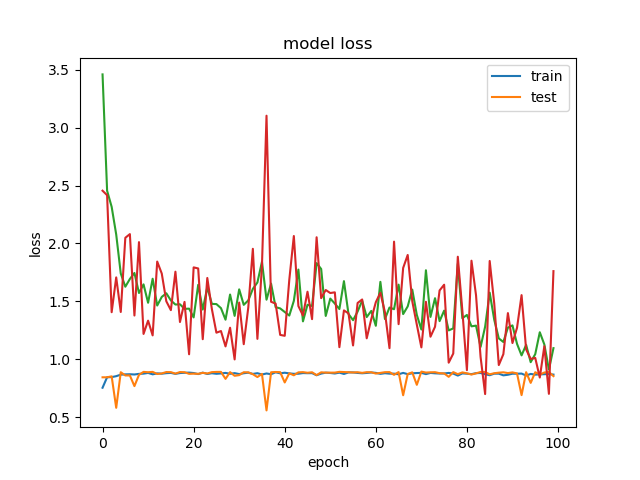